In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import ptitprince
import seaborn as sns

In [2]:
fpath = '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/processed/ses-level_beta_maps_corrs.pkl'
with open(fpath, 'rb') as f:
    datadict = pickle.load(f)

condlist = np.unique(datadict['cond'])
subjlist = np.unique(datadict['subj'])
n_runs = len(datadict['fnames'])

corr_r2 = []
corr_cond = []
corr_intera = []

# Loop to get intra-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] == cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] == subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append(cond)
                            corr_intera.append('intra-subject')
                            

# Loop to get inter-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] == cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] != subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append(cond)
                            corr_intera.append('inter-subject')


# Loop to get intra-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] != cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] == subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append('Inter-annotations')
                            corr_intera.append('intra-subject')
                            

# Loop to get inter-subj R2
for cond in condlist:
    for subj in subjlist:
        for i in range(n_runs):
            for j in range(n_runs):
                if i<j:
                    if datadict['cond'][i] == cond and datadict['cond'][j] != cond:
                        if datadict['subj'][i] == subj and datadict['subj'][j] != subj:
                            corr_r2.append(datadict['corr_matrix'][i,j])
                            corr_cond.append('Inter-annotations')
                            corr_intera.append('inter-subject')

plot_df = pd.DataFrame({'r2':corr_r2,
                        'event': corr_cond,
                        'comparison': corr_intera})


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

intra-subject_Inter-annotations vs. intra-subject_JUMP: t-test independent samples with Bonferroni correction, P_val:5.994e-39 t=-1.339e+01
inter-subject_Inter-annotations vs. inter-subject_JUMP: t-test independent samples with Bonferroni correction, P_val:3.119e-33 t=-1.223e+01
intra-subject_Inter-annotations vs. intra-subject_HIT: t-test independent samples with Bonferroni correction, P_val:3.734e-128 t=-2.531e+01
inter-subject_Inter-annotations vs. inter-subject_HIT: t-test independent samples with Bonferroni correction, P_val:2.793e-141 t=-2.582e+01
inter-subject_Inter-annotations vs. inter-subject_HealthLoss: t-test independent samples with Bonferroni correction, P_val:2.218e-16 t=8.472e+00
intra-subject_Inter-annotations vs. intra-subject_HealthLoss: t-test independent samples with Bonferroni correctio

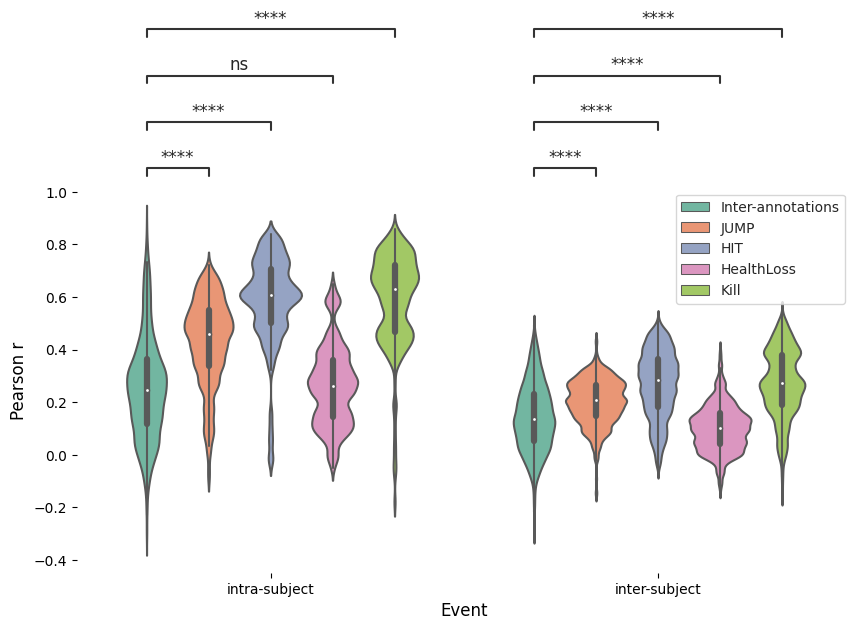

In [3]:
from statannotations.Annotator import Annotator
import scipy

dx="comparison"; dy="r2"; dhue = "event"; ort="v"; pal = "Set2"; sigma = .15
hue_order = ['Inter-annotations', 'JUMP', 'HIT', 'HealthLoss', 'Kill']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.violinplot(x = dx, y = dy, hue = dhue, 
               hue_order=hue_order,
               data = plot_df, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
for comp in np.unique(plot_df.comparison):
    for event in np.unique(plot_df.event):
        if event != 'Inter-annotations':
            pairs.append(((comp, event), (comp, 'Inter-annotations')))

annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, hue_order=hue_order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='bonf')
annotator.apply_and_annotate();


In [29]:
plot_df.groupby(['comparison', 'event']).describe()

r2                                \
                                  count      mean       std       min   
comparison    event                                                     
inter-subject HIT                 758.0  0.267842  0.126030 -0.050839   
              HealthLoss          690.0  0.102274  0.087803 -0.137120   
              Inter-annotations  8892.0  0.143951  0.126887 -0.297863   
              JUMP                758.0  0.201408  0.086092 -0.149792   
              Kill                758.0  0.271012  0.129717 -0.152150   
intra-subject HIT                 232.0  0.587270  0.168513 -0.028245   
              HealthLoss          213.0  0.262116  0.152073 -0.051364   
              Inter-annotations  2988.0  0.254243  0.194822 -0.323383   
              JUMP                232.0  0.430333  0.166004 -0.088479   
              Kill                232.0  0.585412  0.181933 -0.178742   

                                                                         
                                      25%       50%       75%       max  
comparison    event                                                      
inter-subject HIT                0.179896  0.284719  0.363573  0.510339  
              HealthLoss         0.039314  0.101064  0.157205  0.402989  
              Inter-annotations  0.051434  0.136924  0.231197  0.492398  
              JUMP               0.145765  0.207011  0.267103  0.439098  
              Kill               0.188375  0.272724  0.378209  0.544196  
intra-subject HIT                0.501882  0.606977  0.707961  0.838509  
              HealthLoss         0.145341  0.260923  0.361070  0.649011  
              Inter-annotations  0.116343  0.245640  0.362677  0.890337  
              JUMP               0.336017  0.459803  0.552000  0.720917  
              Kill               0.468377  0.628975  0.720863  0.859297

[(('HIT', 'inter-subject'), ('HIT', 'intra-subject')), (('HealthLoss', 'inter-subject'), ('HealthLoss', 'intra-subject')), (('JUMP', 'inter-subject'), ('JUMP', 'intra-subject')), (('Kill', 'inter-subject'), ('Kill', 'intra-subject'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HIT_intra-subject vs. HIT_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:3.265e-148 t=3.104e+01
JUMP_intra-subject vs. JUMP_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.599e-125 t=2.771e+01
Kill_intra-subject vs. Kill_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.865e-135 t=2.917e+01
HealthLoss_intra-subject vs. HealthLoss_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:7.444e-69 t=1.915e+01


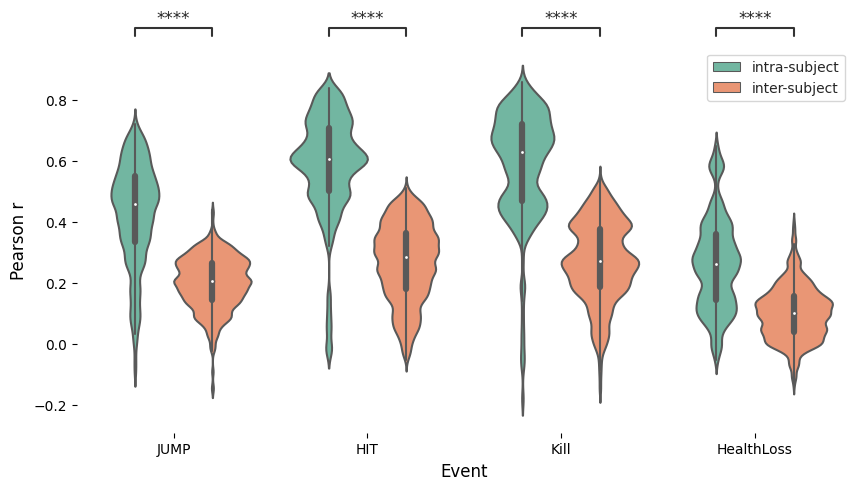

In [3]:
from statannotations.Annotator import Annotator
import scipy

dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
order = ['JUMP', 'HIT', 'Kill', 'HealthLoss']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.violinplot(x = dx, y = dy, hue = dhue, 
               order=order,
               data = plot_df, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
#for comp in np.unique(plot_df.comparison):
for event in np.unique(plot_df.event):
    if event != 'Inter-annotations':
        pairs.append(((event, 'inter-subject'), (event, 'intra-subject')))
        #for ev in order:
            #for comp in np.unique(plot_df.comparison):
                #pairs.append(((event, comp), (ev, comp)))
print(pairs)
annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, order=order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate();


In [4]:
plot_df_intra = plot_df[plot_df.comparison == 'intra-subject']
plot_df_inter = plot_df[plot_df.comparison == 'inter-subject']

,r2,event,comparison
0,0.661470,HIT,intra-subject
1,-0.004476,HIT,intra-subject
2,0.735708,HIT,intra-subject
3,0.414770,HIT,intra-subject
4,0.639137,HIT,intra-subject
...,...,...,...
15748,0.092798,Inter-annotations,inter-subject
15749,0.137961,Inter-annotations,inter-subject
15750,-0.000654,Inter-annotations,inter-subject
15751,0.192476,Inter-annotations,inter-subject


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid 

[(('HIT', 'inter-subject'), ('HIT', 'intra-subject')), (('HealthLoss', 'inter-subject'), ('HealthLoss', 'intra-subject')), (('JUMP', 'inter-subject'), ('JUMP', 'intra-subject')), (('Kill', 'inter-subject'), ('Kill', 'intra-subject'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HIT_intra-subject vs. HIT_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:3.265e-148 t=3.104e+01
JUMP_intra-subject vs. JUMP_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.599e-125 t=2.771e+01
Kill_intra-subject vs. Kill_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.865e-135 t=2.917e+01
HealthLoss_intra-subject vs. HealthLoss_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:7.444e-69 t=1.915e+01


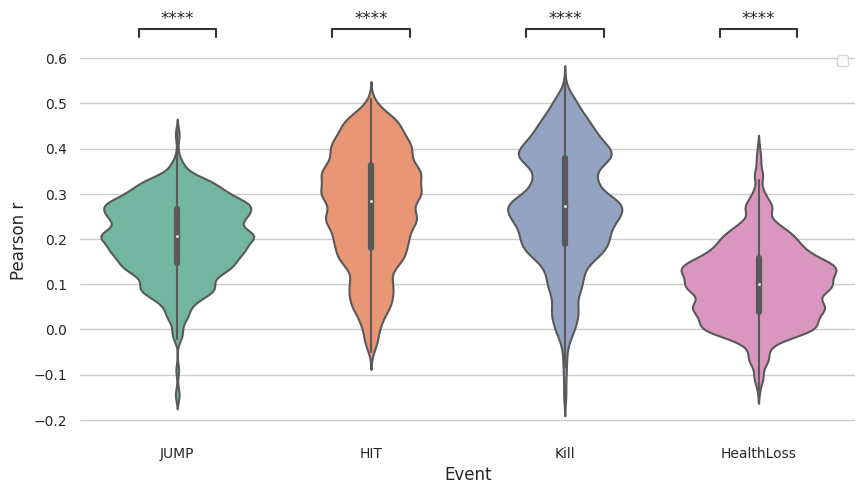

In [7]:
### Split version
## Inter

from statannotations.Annotator import Annotator
import scipy


dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
order = ['JUMP', 'HIT', 'Kill', 'HealthLoss']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.violinplot(x = dx, y = dy, 
               order=order,
               data = plot_df_inter, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
#for comp in np.unique(plot_df.comparison):
for event in np.unique(plot_df.event):
    if event != 'Inter-annotations':
        pairs.append(((event, 'inter-subject'), (event, 'intra-subject')))
        #for ev in order:
            #for comp in np.unique(plot_df.comparison):
                #pairs.append(((event, comp), (ev, comp)))
print(pairs)
annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, order=order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate();


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid x-position found. Are the same parameters passed "
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/statannotations/_Plotter.py:338: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  "Invalid 

[(('HIT', 'inter-subject'), ('HIT', 'intra-subject')), (('HealthLoss', 'inter-subject'), ('HealthLoss', 'intra-subject')), (('JUMP', 'inter-subject'), ('JUMP', 'intra-subject')), (('Kill', 'inter-subject'), ('Kill', 'intra-subject'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

HIT_intra-subject vs. HIT_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:3.265e-148 t=3.104e+01
JUMP_intra-subject vs. JUMP_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.599e-125 t=2.771e+01
Kill_intra-subject vs. Kill_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:1.865e-135 t=2.917e+01
HealthLoss_intra-subject vs. HealthLoss_inter-subject: t-test independent samples with Benjamini-Hochberg correction, P_val:7.444e-69 t=1.915e+01


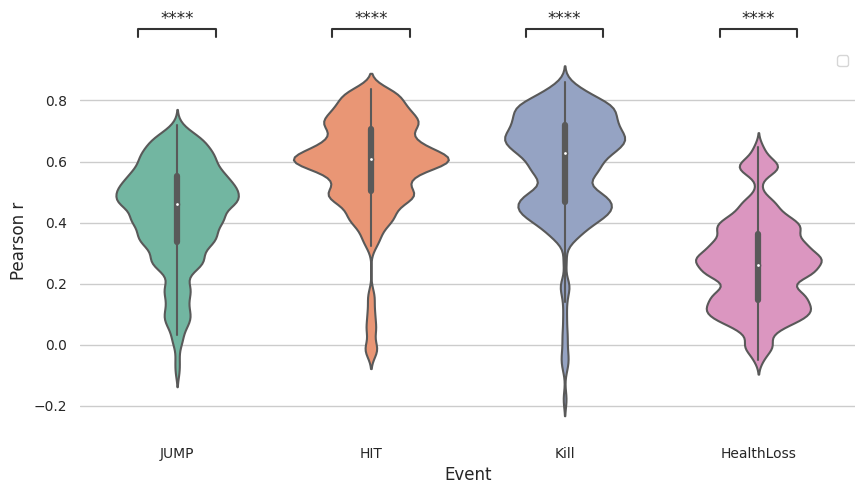

In [8]:
### Split version
## Intra

from statannotations.Annotator import Annotator
import scipy


dx="event"; dy="r2"; dhue = "comparison"; ort="v"; pal = "Set2"; sigma = .15
order = ['JUMP', 'HIT', 'Kill', 'HealthLoss']
f, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale = 2)
sns.set_theme(style="whitegrid")
sns.violinplot(x = dx, y = dy, 
               order=order,
               data = plot_df_intra, palette = pal, bw = sigma,
               ax = ax, orient = ort, alpha = .65, vmax=1)

#ax.set_title('Correlations between beta maps', fontsize=14)
ax.set_xlabel('Event', fontsize=12)
ax.set_ylabel('Pearson r', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.legend(loc='best')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:5], labels[:5], fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



# Build the pairs
pairs = []
#pairs.append(('intra-subject','inter-subject'))
#for comp in np.unique(plot_df.comparison):
for event in np.unique(plot_df.event):
    if event != 'Inter-annotations':
        pairs.append(((event, 'inter-subject'), (event, 'intra-subject')))
        #for ev in order:
            #for comp in np.unique(plot_df.comparison):
                #pairs.append(((event, comp), (ev, comp)))
print(pairs)
annotator = Annotator(ax, pairs, data=plot_df, x=dx, y=dy, hue=dhue, order=order)
#ttest_ind = scipy.stats.ttest_ind()
annotator.configure(test='t-test_ind', text_format='star', loc='outside', comparisons_correction='fdr_bh')
annotator.apply_and_annotate();


Text(0, 0.5, 'Pearson r')

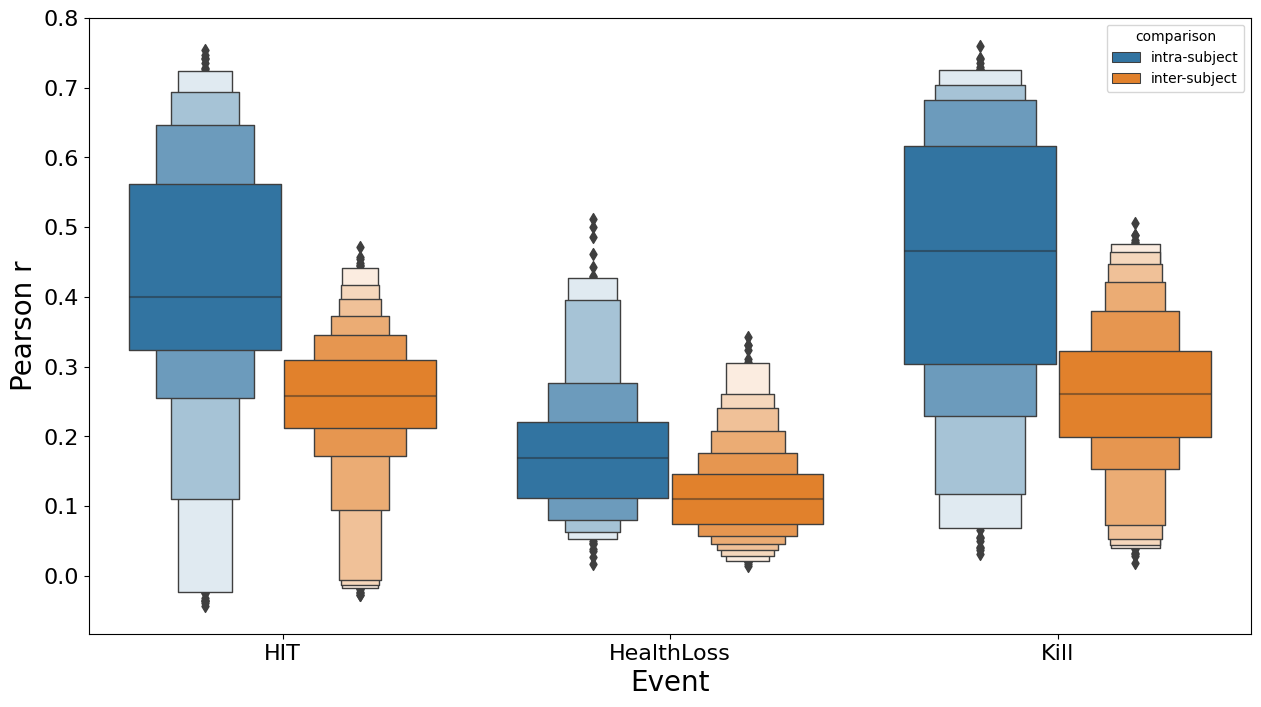

In [9]:
import seaborn as sbn
fig, ax = plt.subplots(figsize=(15,8))
sbn.boxenplot(data=plot_df, x='event', y='r2', hue='comparison', scale='area')
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
ax.set_xlabel('Event', fontsize=20)
ax.set_ylabel('Pearson r', fontsize=20)

/home/hyruuk/mambaforge/envs/shinobi2/lib/python3.8/site-packages/ptitprince/PtitPrince.py:64: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  for h in self.plot_hues[i]], np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

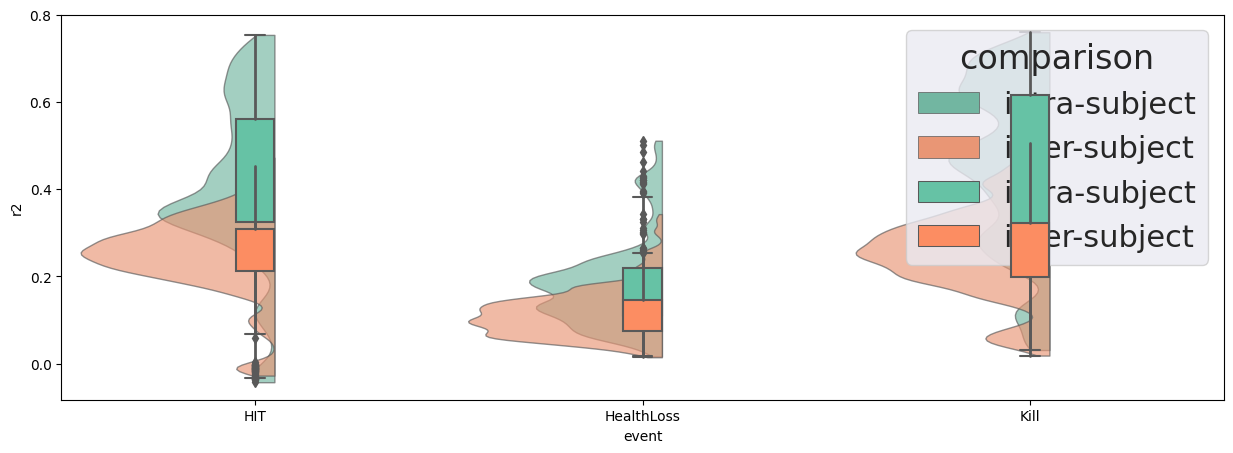